# Cliopatria statistics

In this notebook, we explore the Cliopatria dataset with some simple stats and graphs

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Unzip the Cliopatria GeoJson file
# !unzip -o "../cliopatria.geojson.zip" -d "../"

In [2]:
cliopatria = gpd.read_file("../cliopatria.geojson")
cliopatria.sample(5)

,Name,FromYear,ToYear,Area,Type,Wikipedia,SeshatID,MemberOf,Components,geometry
7415,Qara Qoyunlu,1407,1414,20289.648941,POLITY,Qara Qoyunlu,tr_qara_qoyunlu,,,"POLYGON ((42.38781 39.19107, 42.4179 39.38498,..."
5986,(Holy Roman Empire),1220,1226,866566.770816,POLITY,Holy Roman Empire,de_empire_2,(Personal union of Holy Roman Empire with King...,Holy Roman Empire;(Kingdom of Bohemia);Kingdom...,"POLYGON ((14.51796 51.71418, 14.51585 51.64724..."
1735,Lazica,306,395,24342.327835,POLITY,Lazica,,,,"POLYGON ((42.50412 43.14672, 42.58444 43.14672..."
2561,(Brythonic Kingdoms),592,601,83317.112452,POLITY,Celtic Britons,gb_brythonic_k,,Kingdom of Dunoting;Kingdom of Rheged;Kingdom ...,"MULTIPOLYGON (((-4.18663 50.37908, -4.7679 50...."
14451,Zambia,1967,2023,746916.000063,POLITY,Zambia,,,,"POLYGON ((33.01484 -14.05047, 32.71761 -13.921..."


In [3]:
# Get the range of years available in the dataset
# Note: the range() function in Python generates numbers up to, but not including, the stop value
years = range(cliopatria['FromYear'].min(),
              cliopatria['ToYear'].max() + 1)
years

range(-3400, 2025)

In [4]:
# Calculate the number of of unique entries in the Name column
len(cliopatria['Name'].unique())

1876

In [5]:
# Calculate the number of unique entries in the Name column where MemberOf is a blank string
cliopatria_minus_subpolities = cliopatria[cliopatria['MemberOf'] == '']
len(cliopatria_minus_subpolities['Name'].unique())

1401

In [6]:
# Calculate the number of polities in the dataset for each year
polity_counts = []
for year in years:
    polity_counts.append(
        len(cliopatria_minus_subpolities[(cliopatria_minus_subpolities['FromYear'] <= year)
                                         & (cliopatria_minus_subpolities['ToYear'] >= year)
                                         ]['Name'].unique()
            )
        )

# Create a DataFrame with the results
polity_counts_df = pd.DataFrame({'Year': years, 'Number of polities': polity_counts})

In [7]:
# Take a look at 5 random years
polity_counts_df.sample(5)

,Year,Number of polities
3186,-214,41
4221,821,66
3194,-206,40
2474,-926,10
4819,1419,111


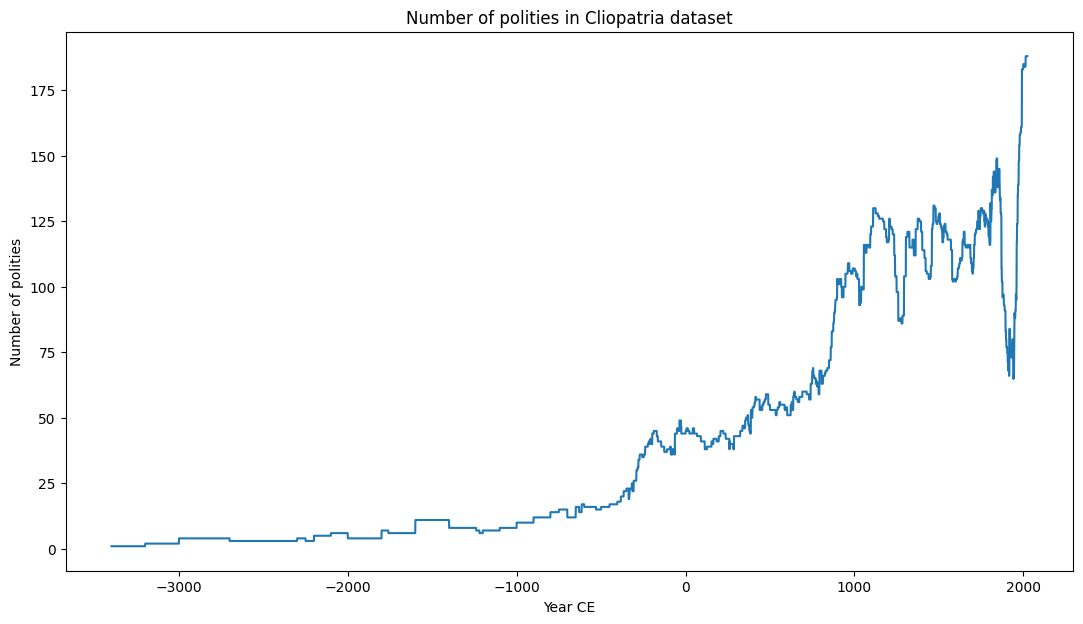

In [8]:
# Plot the number of polities over time
plt.figure(figsize=(13, 7))
plt.plot(polity_counts_df['Year'], polity_counts_df['Number of polities'])
plt.xlabel('Year CE')
plt.ylabel('Number of polities')
plt.title('Number of polities in Cliopatria dataset')
plt.show()

Now let's see if we can get take a look at how polity sizes changed over time...

In [9]:
# Calculate the mean and median of polity area in the dataset for each year
polity_means = []
polity_medians = []
for year in years:
    polity_areas = cliopatria_minus_subpolities[(cliopatria_minus_subpolities['FromYear'] <= year)
                                                & (cliopatria_minus_subpolities['ToYear'] >= year)
                                                ]['Area']
    polity_means.append(polity_areas.mean())
    polity_medians.append(polity_areas.median())

# Create a DataFrame with the results
polity_areas_df = pd.DataFrame({'Year': years,
                                'Mean polity area': polity_means,
                                'Median polity area': polity_medians})

In [10]:
# Take a look at 5 random years
polity_areas_df.sample(5)

,Year,Mean polity area,Median polity area
1423,-1977,253682.586441,102812.806400
323,-3077,20271.221543,20271.221543
3509,109,502841.644581,69767.780867
4280,880,330552.240239,93837.869321
2782,-618,344629.272421,70581.256193


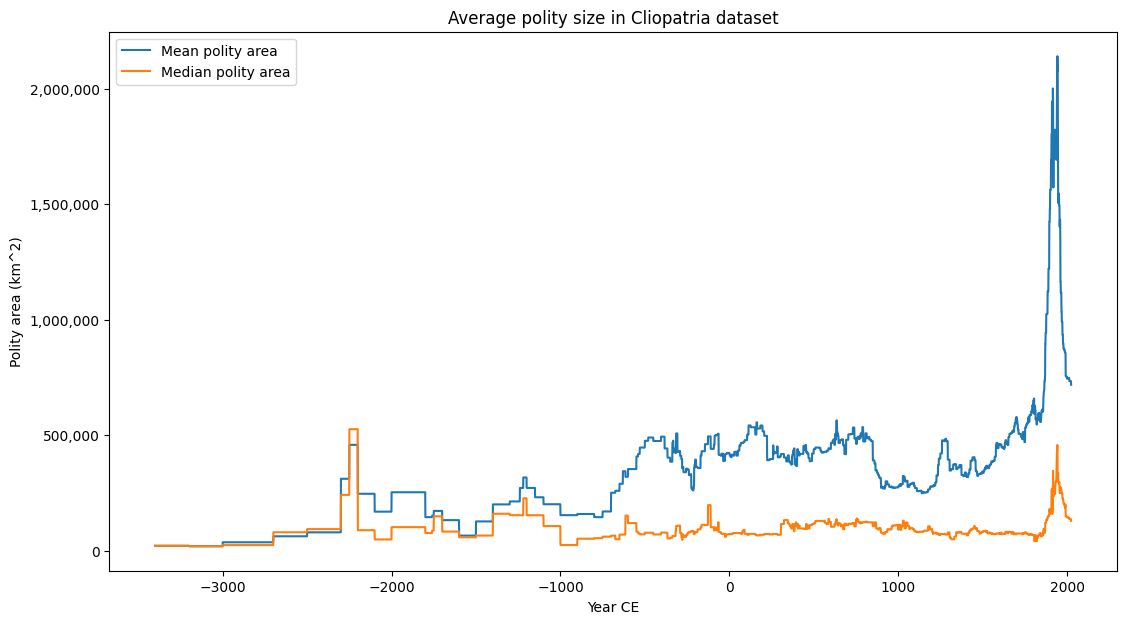

In [11]:
from matplotlib.ticker import FuncFormatter

# Create a plot showing how average polity size (area) changed over time
plt.figure(figsize=(13, 7))
plt.plot(polity_areas_df['Year'], polity_areas_df['Mean polity area'], label='Mean polity area')
plt.plot(polity_areas_df['Year'], polity_areas_df['Median polity area'], label='Median polity area')
plt.xlabel('Year CE')
plt.ylabel('Polity area (km^2)')
plt.title('Average polity size in Cliopatria dataset')
plt.legend()

# Format y-axis to show full numbers
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()